In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
import scoring

# Clustering

## Gene expression

In [2]:
gex = pd.DataFrame.from_csv('Sanger_molecular_data/gex.csv', header=0).transpose()

In [3]:
gex_costs = {}
for i in range(3, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(gex.values)
    gex_costs[i] = (1/i) * kmeans.inertia_
gex_costs

{3: 237518.50561028896,
 4: 171281.81382272116,
 5: 131797.85982280469,
 6: 107055.88570602455,
 7: 90145.843232173822,
 8: 76996.19186492775,
 9: 65971.538762122713,
 10: 58805.163433737209,
 11: 51751.321635826193,
 12: 46915.312736815111,
 13: 41755.639180933045,
 14: 37986.065161884602,
 15: 34366.549337344411,
 16: 31976.119014193362,
 17: 28822.31430973575,
 18: 26401.758366790589,
 19: 25043.5885572968}

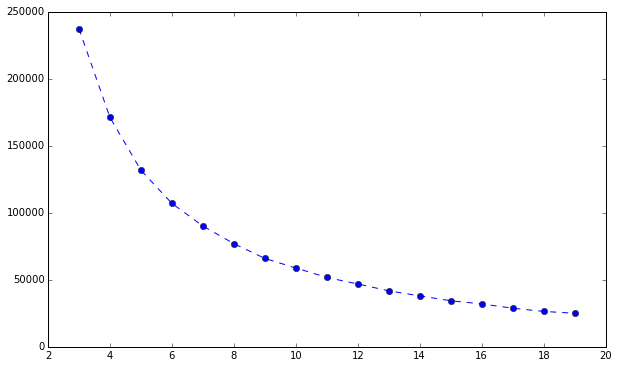

In [4]:
plt.plot([cluster for (cluster, cost) in gex_costs.items()],
         [cost for (cluster, cost) in gex_costs.items()], 'bo--')
plt.show()

In [75]:
gex_kmeans = KMeans(n_clusters = 8, n_init=300)
gex_kmeans.fit(gex.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=300,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [76]:
gex_kmeans.labels_

array([5, 2, 6, 3, 0, 5, 1, 1, 1, 5, 6, 2, 6, 5, 7, 6, 4, 5, 2, 0, 1, 5, 5,
       5, 6, 2, 0, 0, 1, 0, 4, 1, 2, 2, 7, 1, 7, 6, 3, 7, 1, 5, 6, 1, 5, 5,
       6, 5, 0, 5, 6, 1, 6, 1, 3, 2, 3, 1, 1, 3, 6, 3, 3, 6, 6, 2, 6, 7, 4,
       2, 4, 4, 2, 4, 3, 7, 1, 5, 1, 5, 6, 5, 1], dtype=int32)

### Visualize GEX cluster

In [7]:
def plot_cluster(kmeans, reduced_data):
    color_list = ['b', 'r', 'c', 'm', 'y', 'k', '#8400FF', '#00FF15'] 
    labels = kmeans.labels_
    colors = [color_list[i] for i in labels]

    # plot colored points
    plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, s=50)

    # mark centroids as (X)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:,0],centroids[:,1], marker='x', s = 100, linewidths=2, c='none')

    plt.show();

In [8]:
reduced_data = PCA(n_components=2).fit_transform(gex.values)
kmeans_red = KMeans(n_clusters=8, n_init=50)
kmeans_red.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=50,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

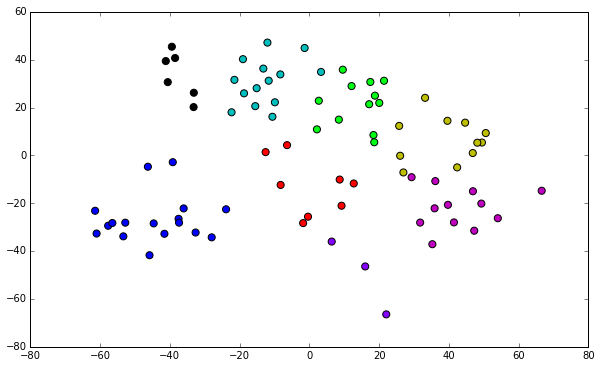

In [9]:
plot_cluster(kmeans_red, reduced_data)

## Cell Info Clustering

In [10]:
cell = pd.DataFrame.from_csv('Sanger_molecular_data/cell_info.csv', header=0)
cell.index.name = None
cell.drop(['CCLE.Name', 'Alternative.Name', 'COSMIC'], axis=1, inplace=True)
cell

,Disease.Area,Tissue..General.
22RV1,Urology,male genital system
647-V,Urology,urinary tract
A549,Lung,lung
BFTC-905,Urology,urinary tract
BT-20,Breast,breast
BT-474,Breast,breast
BT-549,Breast,breast
C32,Niche,soft tissue
CAL-120,Breast,breast
CAL-148,Breast,breast


In [11]:
cell_d = pd.get_dummies(cell)
cell_d.shape

(85, 14)

In [12]:
cell_costs = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cell_d.values)
    cell_costs[i] = (1/i) * kmeans.inertia_
cell_costs

{2: 39.873015873015881,
 3: 15.811965811965813,
 4: 4.5012870012870012,
 5: 2.0395604395604403,
 6: 1.1269841269841265,
 7: 0.47619047619047661,
 8: 2.7755575615628914e-16,
 9: 1.9737298215558337e-16}

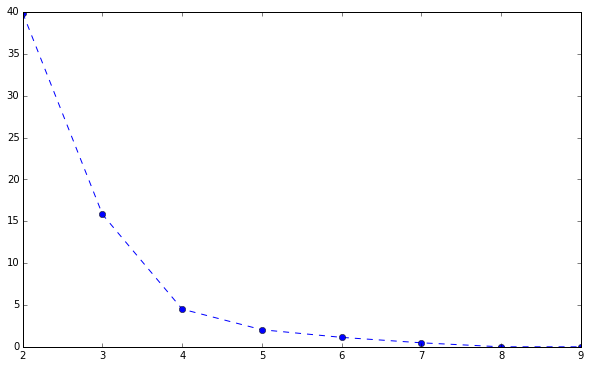

In [13]:
plt.plot([cluster for (cluster, cost) in cell_costs.items()],
         [cost for (cluster, cost) in cell_costs.items()], 'bo--')
plt.show()

In [77]:
cell_kmeans = KMeans(n_clusters = 4, n_init=300)
cell_kmeans.fit(cell_d.values)
cell_kmeans.labels_

array([3, 3, 2, 3, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 3, 0, 3, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 3, 0, 0, 3, 0, 2, 0, 3, 1, 3, 1, 3, 3, 3], dtype=int32)

### Therapy Cluster

In [78]:
orig_data = pd.DataFrame.from_csv('Clean_data/train.csv', header=0)
therapy = orig_data.drop(['SYNERGY_SCORE', 'QA', 'COMBINATION_ID'], axis=1)
therapy = pd.get_dummies(therapy)
therapy.shape

(2145, 110)

In [79]:
therapy_costs = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cell_d.values)
    therapy_costs[i] = (1/i) * kmeans.inertia_
therapy_costs

{2: 39.873015873015881,
 3: 15.811965811965813,
 4: 4.5012870012870012,
 5: 2.0395604395604403,
 6: 1.1269841269841265,
 7: 0.47619047619047661,
 8: 2.7755575615628914e-16,
 9: 1.9737298215558337e-16}

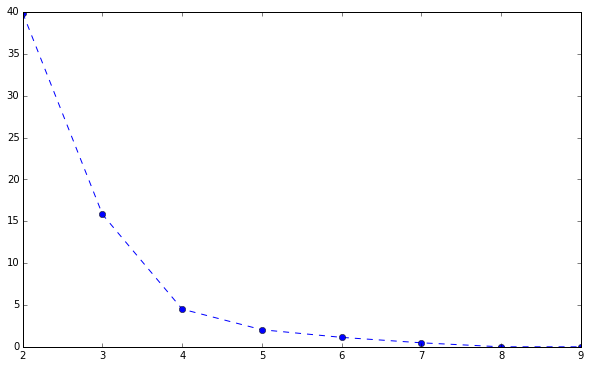

In [80]:
plt.plot([cluster for (cluster, cost) in therapy_costs.items()], 
         [cost for (cluster, cost) in therapy_costs.items()], 'bo--')
plt.show()

In [81]:
therapy_kmeans = KMeans(n_clusters = 4, n_init=300)
therapy_kmeans.fit(therapy.values)
therapy_kmeans.labels_

array([1, 2, 1, ..., 2, 2, 2], dtype=int32)

### Original Data

In [85]:
drug_combined = pd.DataFrame.from_csv('Train_data/drugInfo_combined.csv', index_col=None)

In [86]:
def add_cluster(df):
    rows = df['CELL_LINE'].values
    gex_to_cluster = gex.ix[rows]
    origin_to_cluster = cell_d.ix[rows]
    
    # impute missing values in gene expressions
    imputer = Imputer(missing_values='NaN', strategy="mean", axis=0)
    imputer.fit(gex_to_cluster)
    
    # transform gex, add column w/ prediction
    gex_to_cluster = pd.DataFrame(imputer.transform(gex_to_cluster), columns = gex_to_cluster.columns, index= gex_to_cluster.index)
    
    df['GEX_CLUSTER'] = gex_kmeans.predict(gex_to_cluster)
    df['ORIGIN_CLUSTER'] = cell_kmeans.predict(origin_to_cluster)
    df['THERAPY_CLUSTER'] = therapy_kmeans.predict(therapy)

In [87]:
add_cluster(drug_combined)

In [88]:
drug_combined

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,A_Lipinski,A_MW,B_HBA,B_cLogP,B_HBD,B_Lipinski,B_MW,GEX_CLUSTER,ORIGIN_CLUSTER,THERAPY_CLUSTER
0,BT-20,ADAM17,AKT,1.00,75.00,1.000000,0.809002,59.122436,9.639714,0.757977,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,0,1,1
1,CAL-51,ADAM17,AKT,1.00,75.00,1.000000,0.726984,11.150843,75.000000,0.375043,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6,1,2
2,HCC1187,ADAM17,AKT,1.00,75.00,0.410029,1.496901,51.921265,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,0,1,1
3,HCC1806,ADAM17,AKT,1.00,75.00,0.313992,10.000000,63.399635,75.000000,0.392570,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,2,1,1
4,HCC1937,ADAM17,AKT,1.00,75.00,1.000000,0.771830,41.529554,1.677924,1.119487,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,0,1,2
5,HCC70,ADAM17,AKT,1.00,75.00,0.273313,4.442560,17.441897,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,0,1,2
6,MDA-MB-231,ADAM17,AKT,1.00,75.00,1.000000,10.000000,67.000017,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,1,1,1
7,MDA-MB-436,ADAM17,AKT,1.00,75.00,0.180147,3.095076,75.768080,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6,1,1
8,MDA-MB-453,ADAM17,AKT,1.00,75.00,0.282664,2.263455,34.219723,1.000000,0.000000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,5,1,2
9,M14,ADAM17,AKT,1.00,75.00,0.276412,3.749313,36.292590,0.007500,0.100000,...,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,1,0,2


### Expanded Data

In [121]:
full_df = pd.DataFrame.from_csv('Train_data/drug_exp.csv', index_col=None)

In [122]:
add_cluster(full_df)

In [123]:
full_df

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,B_MW,B_ALogP/XLogP,B_PSA,B_#RotBonds,B_Arom Rings,B_Heavy atoms,B_QED,GEX_CLUSTER,ORIGIN_CLUSTER,THERAPY_CLUSTER
0,BT-20,ADAM17,AKT,1.00,75.00,1.000000,0.809002,59.122436,9.639714,0.757977,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,0,1,1
1,CAL-51,ADAM17,AKT,1.00,75.00,1.000000,0.726984,11.150843,75.000000,0.375043,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,6,1,2
2,HCC1187,ADAM17,AKT,1.00,75.00,0.410029,1.496901,51.921265,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,0,1,1
3,HCC1806,ADAM17,AKT,1.00,75.00,0.313992,10.000000,63.399635,75.000000,0.392570,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,2,1,1
4,HCC1937,ADAM17,AKT,1.00,75.00,1.000000,0.771830,41.529554,1.677924,1.119487,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,0,1,2
5,HCC70,ADAM17,AKT,1.00,75.00,0.273313,4.442560,17.441897,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,0,1,2
6,MDA-MB-231,ADAM17,AKT,1.00,75.00,1.000000,10.000000,67.000017,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,1,1,1
7,MDA-MB-436,ADAM17,AKT,1.00,75.00,0.180147,3.095076,75.768080,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,6,1,1
8,MDA-MB-453,ADAM17,AKT,1.00,75.00,0.282664,2.263455,34.219723,1.000000,0.000000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,5,1,2
9,M14,ADAM17,AKT,1.00,75.00,0.276412,3.749313,36.292590,0.007500,0.100000,...,428.9000,1.32000,120.1600,6.000,3.000,30.000,0.57000,1,0,2


# Algorithm Training

In [21]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import cross_validation, metrics, preprocessing
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

In [22]:
def print_scores(model):
    print("R^2: " + str(model.score(X_test, y_test)))
    print("RMSE: " + str(scoring.rmse(y_test, model.predict(X_test))) ) # root mean squared error
    print("MAE: " + str(metrics.mean_absolute_error(y_test, model.predict(X_test)))) # mean absolute error
    print("MAPE: " + str(scoring.mape(y_test, model.predict(X_test)))) # mean absolute percent error
    print("Error within 20: " + str(scoring.error_within(10, y_test, rfr.predict(X_test)))) # error within
    print("Pearson: " + str(stats.pearsonr(y_test, model.predict(X_test)))) # pearson correlation

In [124]:
orig_data = pd.DataFrame.from_csv('Clean_data/train.csv', header=0, index_col=False)

# No drug database-queried features:

#drug_combined = drug_combined.iloc[np.random.permutation(len(orig_data))]
#Xpd = pd.get_dummies(drug_combined, columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B']) 
#Ypd = orig_data['SYNERGY_SCORE'].reindex(drug_combined.index)

full_df = full_df.iloc[np.random.permutation(len(orig_data))]
Xpd = pd.get_dummies(full_df, columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B']) 
Ypd = orig_data['SYNERGY_SCORE'].reindex(full_df.index)

Xvals = Xpd.values
yvals = Ypd.values

In [125]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)

In [154]:
n_features = n_features = Xvals.shape[1]
rfr = RandomForestRegressor(max_features=.25, max_leaf_nodes=None, 
                            max_depth = None, n_estimators = 1000)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.25, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [155]:
print_scores(rfr)

R^2: 0.348566386996
RMSE: 28.459706383569053
MAE: 19.5898865009
MAPE: 5.08263337622
Error within 20: 0.392923649907
Pearson: (0.59306956483300177, 2.5551470285260432e-52)


In [30]:
cross_validation.cross_val_score(rfr, Xvals, yvals, cv=5)

array([ 0.30396973,  0.32402386,  0.29918763,  0.25016524,  0.31310412])

In [158]:
n_features = Xvals.shape[1]
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 0.25]
}
rfr = RandomForestRegressor()

In [159]:
rnd_search_rf = RandomizedSearchCV(rfr, param_grid_rf, n_jobs=2)
for i in range(3):
    print('NEW RANDOM SEARCH...')
    #X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)
    rnd_search_rf.fit(Xvals, yvals)
    print(rnd_search_rf.best_params_)
    print(rnd_search_rf.best_score_)

NEW RANDOM SEARCH...
{'n_estimators': 1000, 'max_features': 0.25}
0.257705019754
NEW RANDOM SEARCH...
{'n_estimators': 1000, 'max_features': 0.25}
0.257731117558
NEW RANDOM SEARCH...
{'n_estimators': 500, 'max_features': 0.25}
0.258430387927


### Gradient Boosting

In [175]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)

In [176]:
gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=7,
                                max_features='log2', learning_rate=0.03)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.03, loss='ls',
             max_depth=7, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [177]:
print_scores(gbr)

R^2: 0.373635969134
RMSE: 27.94257320621913
MAE: 19.4984952746
MAPE: 7.54021401845
Error within 20: 0.648044692737
Pearson: (0.61331740461065509, 8.5301680006795341e-57)


In [178]:
cross_validation.cross_val_score(gbr, Xvals, yvals, cv=5)

array([ 0.25266754,  0.33715861,  0.34036138,  0.37051874,  0.3941883 ])

In [133]:
param_grid_gb = {
    'learning_rate': [0.02, 0.03],
    'n_estimators': [1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [7, 8]
}
gbr = GradientBoostingRegressor()

In [134]:
grid_search_gb = GridSearchCV(gbr, param_grid_gb, n_jobs=2)
for i in range(3):
    grid_search_gb.fit(Xvals, yvals)
    print(grid_search_gb.best_params_)
    print(grid_search_gb.best_score_)

{'learning_rate': 0.02, 'max_features': 'sqrt', 'n_estimators': 1000, 'max_depth': 7}
0.313719093576
{'learning_rate': 0.02, 'max_features': 'log2', 'n_estimators': 1000, 'max_depth': 7}
0.317219668919
{'learning_rate': 0.03, 'max_features': 'sqrt', 'n_estimators': 1000, 'max_depth': 8}
0.325823191748


## Visualizations

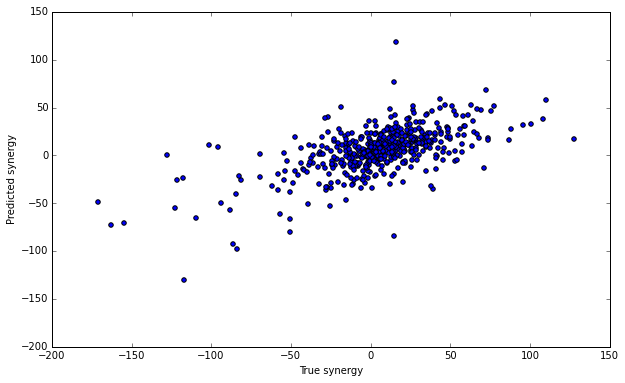

In [179]:
x = y_test
y = gbr.predict(X_test)
plt.scatter(x, y)
plt.axis([-200, 150, -200, 150])

plt.xlabel("True synergy")
plt.ylabel("Predicted synergy")
plt.show()

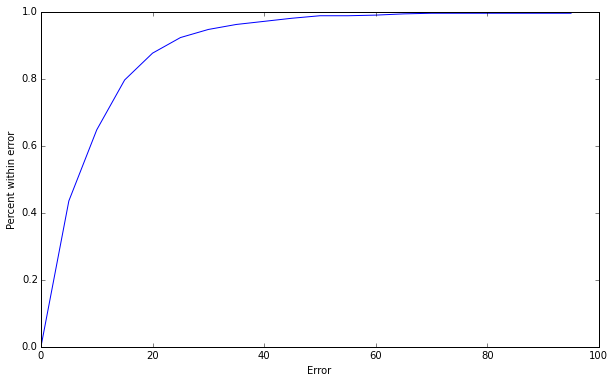

In [180]:
deviation = np.arange(0, 100, 5)
within = np.array([scoring.error_within(x, y_test, rfr.predict(X_test)) for x in deviation])
plt.plot(deviation, within)

plt.xlabel("Error")
plt.ylabel("Percent within error")
plt.show()

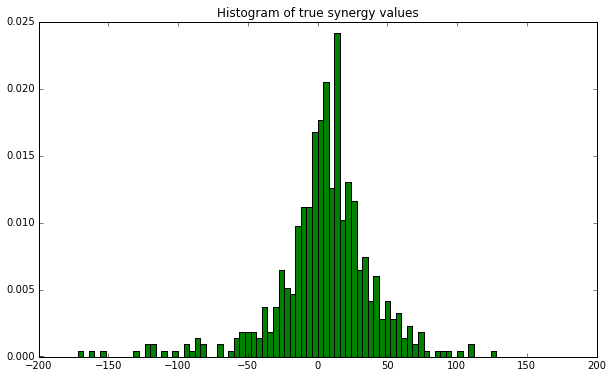

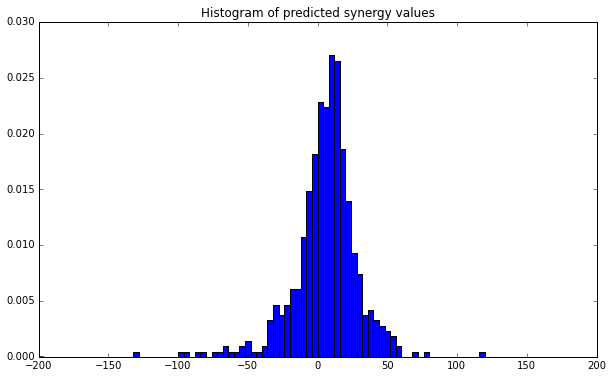

In [181]:
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', range=(-200, 200))
plt.title('Histogram of true synergy values')
plt.figure()
n, bins, patches = plt.hist(y, num_bins, normed=1, facecolor='blue', range=(-200, 200))
plt.title('Histogram of predicted synergy values')
plt.show()